In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import MiniBatchKMeans, Birch
from scipy.cluster.hierarchy import dendrogram

import re
import string
import time
from PIL import Image
from collections import Counter

import plotly.express as px

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words as nltk_words
from nltk.corpus import stopwords

nltk.download('stopwords', download_dir='../resources')
nltk.download('punkt', download_dir='../resources')
nltk.download('wordnet', download_dir='../resources')
nltk.download('omw-1.4', download_dir='../resources')
nltk.download('words', download_dir='../resources')

[nltk_data] Downloading package stopwords to ../../../Resources...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to ../../../Resources...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to ../../../Resources...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to ../../../Resources...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to ../../../Resources...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
nltk.data.path.append('../resources')

In [3]:
FIELD_NAME = 'title'

In [5]:
data = pd.read_csv(f'../data/prepared/{FIELD_NAME}/punctuation_stopwords_lemmatization.csv')
data

title
0     ukraine angry zelensky vow punish russian atro...
1                    war ukraine take cover town attack
2                  ukraine war catastrophic global food
3     manchester arena bomb saffie roussoss parent h...
4     ukraine conflict oil price soar highest level ...
...                                                 ...
7359  premiership harlequin 2730 saracen sarries win...
7360                             queue expert help plan
7361                            cowboy queen bond horse
7362               queen amuse american breach protocol
7363  queen elizabeth iis special connection windsor...

[7364 rows x 1 columns]

## Vectorization

In [7]:
cv = CountVectorizer(analyzer='word')
cv_data = cv.fit_transform(data[FIELD_NAME])
dtm_data = pd.DataFrame(cv_data.toarray(), columns=cv.get_feature_names_out())
dtm_data.index = data.index
dtm_data.head(5)

10  100  1000  10000  100000  10000m  1000yearold  100k  100m  100yearold  \
0   0    0     0      0       0       0            0     0     0           0   
1   0    0     0      0       0       0            0     0     0           0   
2   0    0     0      0       0       0            0     0     0           0   
3   0    0     0      0       0       0            0     0     0           0   
4   0    0     0      0       0       0            0     0     0           0   

   ...  zombie  zombified  zone  zoo  zoom  zulu  zurich  zuu  zverev  \
0  ...       0          0     0    0     0     0       0    0       0   
1  ...       0          0     0    0     0     0       0    0       0   
2  ...       0          0     0    0     0     0       0    0       0   
3  ...       0          0     0    0     0     0       0    0       0   
4  ...       0          0     0    0     0     0       0    0       0   

   zwelithini  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 10130 columns]

In [8]:
word_freq_data_normalized = dtm_data.T
word_freq_data_normalized

0     1     2     3     4     5     6     7     8     9     ...  \
10             0     0     0     0     0     0     0     0     0     0  ...   
100            0     0     0     0     0     0     0     0     0     0  ...   
1000           0     0     0     0     0     0     0     0     0     0  ...   
10000          0     0     0     0     0     0     0     0     0     0  ...   
100000         0     0     0     0     0     0     0     0     0     0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
zulu           0     0     0     0     0     0     0     0     0     0  ...   
zurich         0     0     0     0     0     0     0     0     0     0  ...   
zuu            0     0     0     0     0     0     0     0     0     0  ...   
zverev         0     0     0     0     0     0     0     0     0     0  ...   
zwelithini     0     0     0     0     0     0     0     0     0     0  ...   

            7354  7355  7356  7357  7358  7359  7360  7361  7362  7363  
10             0     0     0     0     0     0     0     0     0     0  
100            0     0     0     0     0     0     0     0     0     0  
1000           0     0     0     0     0     0     0     0     0     0  
10000          0     0     0     0     0     0     0     0     0     0  
100000         0     0     0     0     0     0     0     0     0     0  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
zulu           0     0     0     0     0     0     0     0     0     0  
zurich         0     0     0     0     0     0     0     0     0     0  
zuu            0     0     0     0     0     0     0     0     0     0  
zverev         0     0     0     0     0     0     0     0     0     0  
zwelithini     0     0     0     0     0     0     0     0     0     0  

[10130 rows x 7364 columns]

In [9]:
word_freq_data = pd.DataFrame(word_freq_data_normalized.sum(axis=1).reset_index()).rename(columns={'index': 'word', 0: 'freq'})
word_freq_data

word  freq
0              10    59
1             100    18
2            1000     2
3           10000     2
4          100000     4
...           ...   ...
10125        zulu     1
10126      zurich     2
10127         zuu     1
10128      zverev     2
10129  zwelithini     1

[10130 rows x 2 columns]

In [10]:
TRIM_QUANTILE = 0.7
word_freq_data[word_freq_data['freq'] >= word_freq_data['freq'].quantile(TRIM_QUANTILE)]

word  freq
0             10    59
1            100    18
4         100000     4
5         10000m     4
8           100m    19
...          ...   ...
10108  zerocovid     6
10115   zimbabwe     3
10116  zinchenko     3
10122       zone     7
10123        zoo     8

[3474 rows x 2 columns]

In [11]:
stopwords = list(word_freq_data[word_freq_data['freq'] < word_freq_data['freq'].quantile(TRIM_QUANTILE)]['word'])
vec_vocab = list(word_freq_data[word_freq_data['freq'] >= word_freq_data['freq'].quantile(TRIM_QUANTILE)]['word'])

In [12]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', stop_words=stopwords, vocabulary=vec_vocab)
tfidf_vectorizer

TfidfVectorizer(stop_words=['1000', '10000', '1000yearold', '100k',
                            '100yearold', '10300', '1038', '103rd', '104',
                            '104th', '105yearold', '1084', '10bn', '10goal',
                            '10p', '10plus', '10th', '10wicket', '10year',
                            '1100', '110m', '111', '113m', '114', '115000',
                            '11bn', '11m', '1200', '12000', '1213', ...],
                vocabulary=['10', '100', '100000', '10000m', '100m', '10m',
                            '10man', '11', '12', '13', '14', '15', '150',
                            '1500m', '16', '17', '18', '18th', '19', '1m', '1s',
                            '20', '200', '2000', '200m', '2012', '2019', '2021',
                            '2022', '202223', ...])

In [15]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data[FIELD_NAME])
tfidf_matrix

<7364x3474 sparse matrix of type '<class 'numpy.float64'>'
	with 46670 stored elements in Compressed Sparse Row format>

In [16]:
tfidf_data = pd.DataFrame(tfidf_matrix.toarray())
tfidf_data

0     1     2     3     4     5     6     7     8     9     ...  3464  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
7359   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7360   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7361   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7362   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7363   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      3465      3466  3467  3468  3469  3470  3471  3472  3473  
0      0.0  0.336856   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...       ...   ...   ...   ...   ...   ...   ...   ...  
7359   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7360   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7361   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7362   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7363   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[7364 rows x 3474 columns]

In [17]:
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_names

array(['10', '100', '100000', ..., 'zinchenko', 'zone', 'zoo'],
      dtype=object)

In [18]:
tfidf_data.columns = feature_names
tfidf_data

10  100  100000  10000m  100m  10m  10man   11   12   13  ...  \
0     0.0  0.0     0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0  ...   
1     0.0  0.0     0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0  ...   
2     0.0  0.0     0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0  ...   
3     0.0  0.0     0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0  ...   
4     0.0  0.0     0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0  ...   
...   ...  ...     ...     ...   ...  ...    ...  ...  ...  ...  ...   
7359  0.0  0.0     0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0  ...   
7360  0.0  0.0     0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0  ...   
7361  0.0  0.0     0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0  ...   
7362  0.0  0.0     0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0  ...   
7363  0.0  0.0     0.0     0.0   0.0  0.0    0.0  0.0  0.0  0.0  ...   

      zaporizhzhia  zealand  zelensky  zelenskys  zero  zerocovid  zimbabwe  \
0              0.0      0.0  0.336856        0.0   0.0        0.0       0.0   
1              0.0      0.0  0.000000        0.0   0.0        0.0       0.0   
2              0.0      0.0  0.000000        0.0   0.0        0.0       0.0   
3              0.0      0.0  0.000000        0.0   0.0        0.0       0.0   
4              0.0      0.0  0.000000        0.0   0.0        0.0       0.0   
...            ...      ...       ...        ...   ...        ...       ...   
7359           0.0      0.0  0.000000        0.0   0.0        0.0       0.0   
7360           0.0      0.0  0.000000        0.0   0.0        0.0       0.0   
7361           0.0      0.0  0.000000        0.0   0.0        0.0       0.0   
7362           0.0      0.0  0.000000        0.0   0.0        0.0       0.0   
7363           0.0      0.0  0.000000        0.0   0.0        0.0       0.0   

      zinchenko  zone  zoo  
0           0.0   0.0  0.0  
1           0.0   0.0  0.0  
2           0.0   0.0  0.0  
3           0.0   0.0  0.0  
4           0.0   0.0  0.0  
...         ...   ...  ...  
7359        0.0   0.0  0.0  
7360        0.0   0.0  0.0  
7361        0.0   0.0  0.0  
7362        0.0   0.0  0.0  
7363        0.0   0.0  0.0  

[7364 rows x 3474 columns]

# Truncated SVD

In [19]:
tsvd = TruncatedSVD(n_components=100, random_state=37)
vec_matrix_tsvd = tsvd.fit_transform(tfidf_matrix)
vec_matrix_tsvd

array([[ 0.19978335, -0.04005646, -0.02396873, ..., -0.01472769,
        -0.01402829,  0.01930215],
       [ 0.36293085, -0.04590182, -0.0462787 , ..., -0.0456835 ,
        -0.01443723,  0.00819415],
       [ 0.43483856, -0.09158288, -0.05491468, ...,  0.00806557,
        -0.03116271,  0.03850283],
       ...,
       [ 0.00654533,  0.03929383,  0.14048197, ..., -0.01214322,
         0.00123837,  0.01609791],
       [ 0.00789873,  0.04007611,  0.13302144, ..., -0.00351566,
         0.00865415,  0.0127503 ],
       [ 0.00797904,  0.05045441,  0.13281767, ...,  0.00487705,
         0.0097718 , -0.00754095]])

In [20]:
pd.DataFrame(vec_matrix_tsvd)

0         1         2         3         4         5         6   \
0     0.199783 -0.040056 -0.023969  0.005654  0.002589  0.008154 -0.002490   
1     0.362931 -0.045902 -0.046279  0.026065 -0.025083 -0.014305  0.004692   
2     0.434839 -0.091583 -0.054915  0.025006  0.015086  0.018577  0.020465   
3     0.017034  0.018833  0.015266 -0.004906 -0.023068 -0.033604 -0.032924   
4     0.158024 -0.010472  0.019745 -0.027138  0.015177  0.008093  0.009810   
...        ...       ...       ...       ...       ...       ...       ...   
7359  0.013114  0.083663 -0.039543  0.016364 -0.039468 -0.090414  0.078258   
7360  0.025756  0.029814  0.081324 -0.026429  0.017552 -0.003425  0.008473   
7361  0.006545  0.039294  0.140482  0.261886  0.033752  0.034911  0.006943   
7362  0.007899  0.040076  0.133021  0.222221  0.037288  0.031612  0.006704   
7363  0.007979  0.050454  0.132818  0.256144  0.027165  0.031044  0.003072   

            7         8         9   ...        90        91        92  \
0    -0.004649 -0.003043  0.012417  ...  0.014482 -0.027892 -0.006438   
1    -0.006333  0.008956  0.021435  ...  0.010001  0.012449  0.030098   
2     0.014541  0.011998  0.045153  ...  0.056948 -0.017231  0.080437   
3     0.000865 -0.027887 -0.022913  ... -0.006826 -0.066447  0.003932   
4     0.035474  0.001656  0.042876  ... -0.003592  0.014509 -0.042921   
...        ...       ...       ...  ...       ...       ...       ...   
7359 -0.020264 -0.037424  0.005289  ... -0.008164  0.001904  0.011944   
7360  0.007189 -0.014882  0.036309  ...  0.009555  0.006803 -0.036629   
7361  0.003437 -0.019975  0.004285  ... -0.014587 -0.005902  0.003416   
7362 -0.007885 -0.015478  0.006432  ... -0.026589 -0.000336 -0.015631   
7363  0.006085 -0.023230  0.014943  ...  0.011777  0.028647 -0.003806   

            93        94        95        96        97        98        99  
0     0.005849 -0.021357 -0.036861  0.022977 -0.014728 -0.014028  0.019302  
1    -0.021177 -0.005433  0.006022 -0.022944 -0.045684 -0.014437  0.008194  
2    -0.049122  0.089920  0.017087 -0.087588  0.008066 -0.031163  0.038503  
3    -0.023235 -0.003444  0.009928 -0.036194 -0.004678 -0.037198 -0.027711  
4    -0.007379 -0.010725  0.018104 -0.015294 -0.027351  0.034181 -0.087121  
...        ...       ...       ...       ...       ...       ...       ...  
7359 -0.004165 -0.009592  0.009894  0.003514 -0.003211 -0.005891  0.007033  
7360  0.016279  0.025882  0.003025 -0.018202 -0.031082  0.010415 -0.024784  
7361 -0.004681  0.004614 -0.027021  0.012656 -0.012143  0.001238  0.016098  
7362  0.000764  0.002592 -0.004808  0.023017 -0.003516  0.008654  0.012750  
7363 -0.014694 -0.029753 -0.029599 -0.002679  0.004877  0.009772 -0.007541  

[7364 rows x 100 columns]

In [21]:
BATCH_SIZE = 10

In [22]:
kmeans_clst = MiniBatchKMeans(n_clusters=5, random_state=37, batch_size=10)
kmeans_clst = kmeans_clst.partial_fit(vec_matrix_tsvd)

In [23]:
kmeans_clst.cluster_centers_

array([[ 4.79552453e-02,  4.42970308e-02,  2.24894264e-02,
        -2.65156058e-03,  2.87200566e-03, -1.14763513e-02,
        -1.65198465e-03, -6.24196063e-04,  1.82556315e-04,
        -2.39033640e-03, -8.11972764e-04,  3.84966331e-03,
        -3.18192380e-03,  6.43353797e-03, -2.78595426e-03,
         3.22056297e-03, -4.54017354e-03,  1.42447760e-03,
         1.43224171e-03,  2.31722462e-03, -2.93522038e-03,
         2.39388564e-03,  2.76120441e-03,  1.69476121e-03,
         1.37921978e-03,  2.00878135e-03, -1.02347235e-03,
         3.30718593e-03, -1.69351422e-03,  6.35209273e-04,
         1.00192918e-03, -6.79928205e-04, -1.07909606e-04,
         1.09791669e-04, -2.47231121e-03,  3.17111203e-03,
         1.91231519e-04, -1.54123623e-03, -1.80507024e-03,
         6.06318331e-04,  8.54887894e-05, -5.57334006e-04,
         1.75599278e-03, -3.99576555e-05,  2.67986257e-03,
         1.87371489e-03,  2.92232208e-03,  2.10606433e-03,
         1.76006364e-03,  6.15791696e-04,  9.19434031e-0

In [24]:
kmeans_clst.labels_

array([0, 3, 3, ..., 0, 0, 0], dtype=int32)

In [25]:
data['kmeans_label'] = kmeans_clst.labels_

# Visualizing results

In [26]:
tsvd_centers = TruncatedSVD(n_components=2, random_state=37)
tsvd_centers.fit(kmeans_clst.cluster_centers_)
d2_centers = tsvd_centers.transform(kmeans_clst.cluster_centers_)
d2_points = tsvd_centers.transform(vec_matrix_tsvd)

In [27]:
tsvd_centers = TruncatedSVD(n_components=3, random_state=37)
tsvd_centers.fit(kmeans_clst.cluster_centers_)
d3_centers = tsvd_centers.transform(kmeans_clst.cluster_centers_)
d3_points = tsvd_centers.transform(vec_matrix_tsvd)

In [28]:
d2_centers

array([[ 0.03348221,  0.01288117],
       [ 0.00871619,  0.00219691],
       [ 0.51795867, -0.04960857],
       [ 0.31305779, -0.02699854],
       [ 0.06697912,  0.50309483]])

In [29]:
d2_points

array([[ 0.10475727, -0.02426099],
       [ 0.27282409, -0.03801481],
       [ 0.35121888, -0.08253441],
       ...,
       [ 0.01588762,  0.1537915 ],
       [ 0.01644843,  0.12887929],
       [ 0.01269644,  0.15507221]])

In [30]:
sns.set_style('darkgrid')

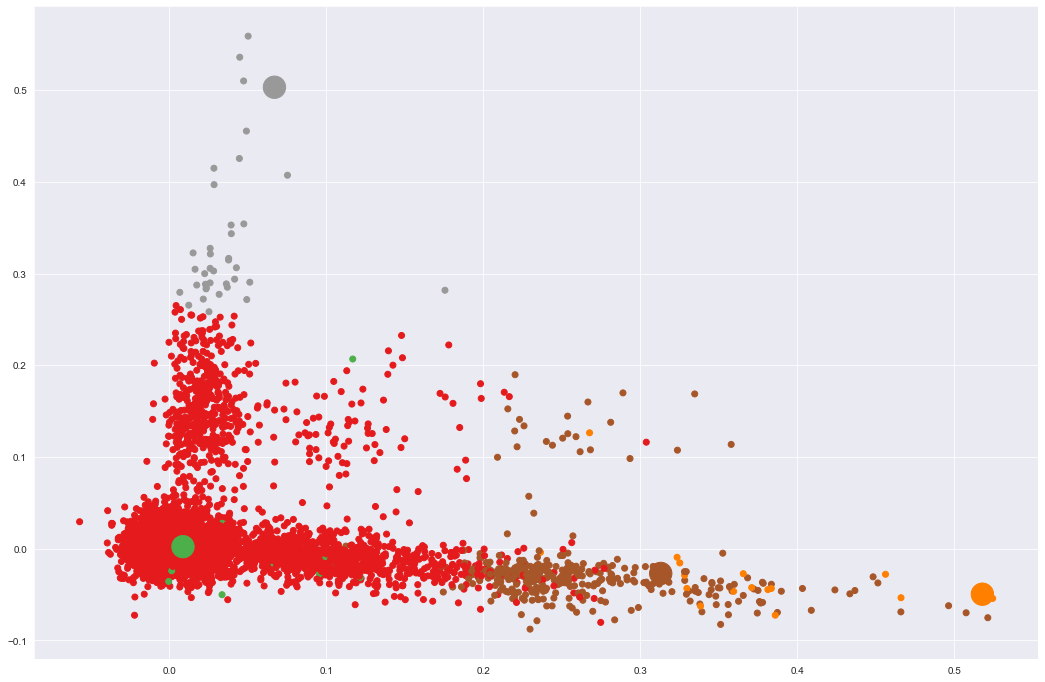

In [31]:
plt.figure(figsize=(18, 12))
plt.scatter(x=d2_points[:, 0], y=d2_points[:, 1], c=kmeans_clst.labels_, cmap='Set1')
plt.scatter(x=d2_centers[:, 0], y=d2_centers[:, 1], c=np.unique(kmeans_clst.labels_), s=[500, 500, 500, 500, 500], cmap='Set1')

In [32]:
fig_centers = px.scatter(x=d2_centers[:, 0], y=d2_centers[:, 1], color=np.unique(kmeans_clst.labels_), size=[500, 500, 500, 500, 500])
fig_points = px.scatter(x=d2_points[:, 0], y=d2_points[:, 1], color=kmeans_clst.labels_)
fig = go.Figure(data=fig_centers.data)
fig.add_traces(fig_points.data)
fig.show()

In [33]:
fig_centers = px.scatter_3d(x=d3_centers[:, 0], y=d3_centers[:, 1], z=d3_centers[:, 2], color=np.unique(kmeans_clst.labels_), size=[50, 50, 50, 50, 50], size_max=50)
fig_points = px.scatter_3d(x=d3_points[:, 0], y=d3_points[:, 1], z=d3_points[:, 2], color=kmeans_clst.labels_, symbol=kmeans_clst.labels_)
fig = go.Figure(data=fig_centers.data + fig_points.data)
fig.show()

In [34]:
def to_viz_data(data, tfidf_data, labels):
    transformed_data = []
    for label in labels:
        new_data = tfidf_data[tfidf_data[data['label'] == label].idxmax(axis=1)].max()[:200]
        transformed_data.append(pd.concat([new_data.reset_index(), pd.Series([label] * len(new_data))], axis=1))
    viz_data = pd.concat(transformed_data)
    viz_data.columns = ['word', 'tfidf', 'label']
    return viz_data

In [35]:
viz_data = to_viz_data(data.rename({'kmeans_label': 'label'}, axis=1), tfidf_data, data['kmeans_label'].unique())
viz_data

word     tfidf  label
0       atrocity  0.489717      0
1          arena  0.494831      0
2        highest  0.518936      0
3          grant  0.468321      0
4          limit  0.542823      0
..           ...       ...    ...
13     immediate  0.498698      2
14         kyivs  0.602433      2
15          land  0.540860      2
16          seed  0.488581      2
17  zaporizhzhia  0.529306      2

[521 rows x 3 columns]

In [36]:
def visualize_clusters(viz_data):
    viz_data = viz_data.copy()
    viz_data['label'] += np.abs(viz_data['label'].min())
    viz_data = viz_data.sort_values('label').groupby('label').head(20)
    fig = px.scatter(viz_data, x='label', y='tfidf', color='label', text='word', hover_data=['label', 'tfidf', 'word'])
    fig.update_layout(
        font=dict(
            family='Courier New, monospace',
            size=18,  # Set the font size here
            color='black'
        ),
        xaxis = dict(
            tickmode = 'linear',
            tick0 = 0,
            dtick = 1
        ),
        yaxis = dict(
            tickmode = 'linear',
            tick0 = 0,
            dtick = 0.05
        )
    )
    text_fonts = (np.e**(viz_data['tfidf'] * 4.5)).astype(int)
    fig.update_traces(mode='text', selector=dict(type='scatter'), textfont_size=(text_fonts).values)
    fig.for_each_trace(lambda t: t.update(textfont_color=np.array(px.colors.qualitative.Dark24)[t.marker.color], textposition='bottom center'))
    fig.show()

In [37]:
visualize_clusters(viz_data)